In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

base_path = '/content/drive/MyDrive/healthcarefraud_detection'

folders = [
    f'{base_path}/data/raw',
    f'{base_path}/data/processed',
    f'{base_path}/models',
    f'{base_path}/reports',
    f'{base_path}/notebooks',
    f'{base_path}/src'
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Folders created:")
for folder in folders:
    print(folder)


Folders created:
/content/drive/MyDrive/healthcarefraud_detection/data/raw
/content/drive/MyDrive/healthcarefraud_detection/data/processed
/content/drive/MyDrive/healthcarefraud_detection/models
/content/drive/MyDrive/healthcarefraud_detection/reports
/content/drive/MyDrive/healthcarefraud_detection/notebooks
/content/drive/MyDrive/healthcarefraud_detection/src


In [4]:
base_path = '/content/drive/MyDrive/healthcarefraud_detection/data/raw'

train = pd.read_csv(f'{base_path}/Train.csv')
test = pd.read_csv(f'{base_path}/Test.csv')
train_bene = pd.read_csv(f'{base_path}/Train_Beneficiarydata.csv')
test_bene = pd.read_csv(f'{base_path}/Test_Beneficiarydata.csv')
train_inp = pd.read_csv(f'{base_path}/Train_Inpatientdata.csv')
test_inp = pd.read_csv(f'{base_path}/Test_Inpatientdata.csv')
train_out = pd.read_csv(f'{base_path}/Train_Outpatientdata.csv')
test_out = pd.read_csv(f'{base_path}/Test_Outpatientdata.csv')



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [6]:
from IPython.display import display
import pandas as pd

def display_missing_info(df, df_name):
    """Displays info and missing value percentages in a tabular format."""
    print(f"\n{df_name}")
    df.info()

    missing_counts = df.isnull().sum()
    missing_percentages = (df.isnull().mean() * 100)

    missing_info_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percentages
    })

    # Filter out columns with no missing values for a cleaner table
    missing_info_df = missing_info_df[missing_info_df['Missing Count'] > 0]

    if not missing_info_df.empty:
        print("\nMissing Value Summary:")
        display(missing_info_df)
    else:
        print("\nNo missing values.")


#The dataframes (train, train_bene, train_inp, train_out) are already loaded
display_missing_info(train, "Train.csv")
display_missing_info(train_bene, "Train_Beneficiarydata.csv")
display_missing_info(train_inp, "Train_Inpatientdata.csv")
display_missing_info(train_out, "Train_Outpatientdata.csv")


Train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB

No missing values.

Train_Beneficiarydata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State  

,Missing Count,Missing Percentage (%)
DOD,137135,98.974422



Train_Inpatientdata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisC

,Missing Count,Missing Percentage (%)
AttendingPhysician,112,0.276721
OperatingPhysician,16644,41.122696
OtherPhysician,35784,88.412314
DeductibleAmtPaid,899,2.221179
ClmDiagnosisCode_2,226,0.558383
ClmDiagnosisCode_3,676,1.670208
ClmDiagnosisCode_4,1534,3.790087
ClmDiagnosisCode_5,2894,7.150269
ClmDiagnosisCode_6,4838,11.953353
ClmDiagnosisCode_7,7258,17.932500



Train_Outpatientdata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 

,Missing Count,Missing Percentage (%)
AttendingPhysician,1396,0.269635
OperatingPhysician,427120,82.497484
OtherPhysician,322691,62.327205
ClmDiagnosisCode_1,10453,2.018979
ClmDiagnosisCode_2,195380,37.737307
ClmDiagnosisCode_3,314480,60.741264
ClmDiagnosisCode_4,392141,75.741351
ClmDiagnosisCode_5,443393,85.640586
ClmDiagnosisCode_6,468981,90.582864
ClmDiagnosisCode_7,484776,93.633640


In [7]:
print("Providers in train:", train['Provider'].nunique())
print("Providers in inpatient:", train_inp['Provider'].nunique())
print("Providers in outpatient:", train_out['Provider'].nunique())

print("Unique beneficiaries in claims (inpatient):", train_inp['BeneID'].nunique())
print("Unique beneficiaries in claims (outpatient):", train_out['BeneID'].nunique())
print("Beneficiaries in beneficiary data:", train_bene['BeneID'].nunique())


Providers in train: 5410
Providers in inpatient: 2092
Providers in outpatient: 5012
Unique beneficiaries in claims (inpatient): 31289
Unique beneficiaries in claims (outpatient): 133980
Beneficiaries in beneficiary data: 138556


Plot saved to /content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/eda_missing_train_inp.png


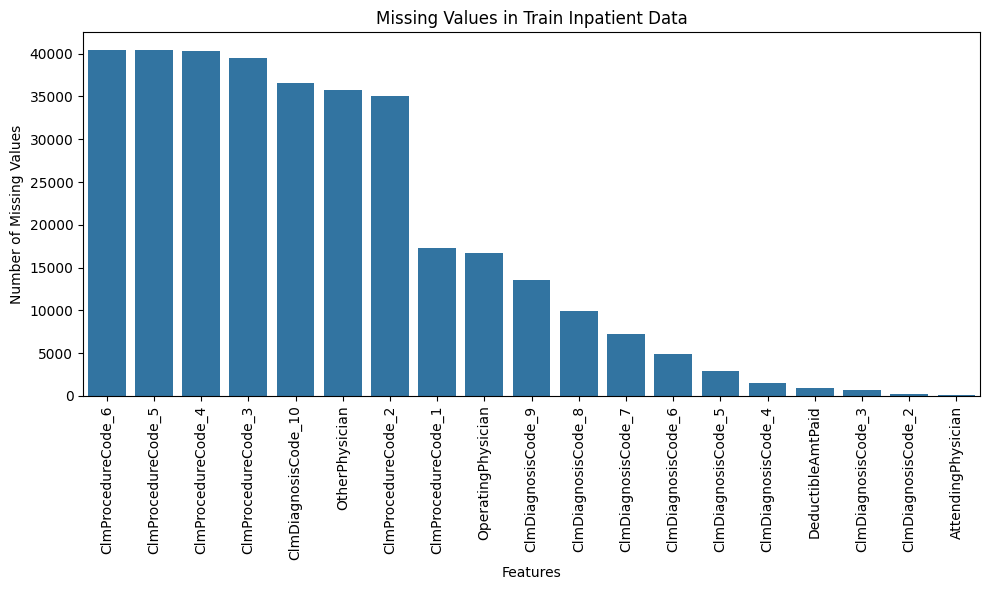

Plot saved to /content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/eda_missing_train_out.png


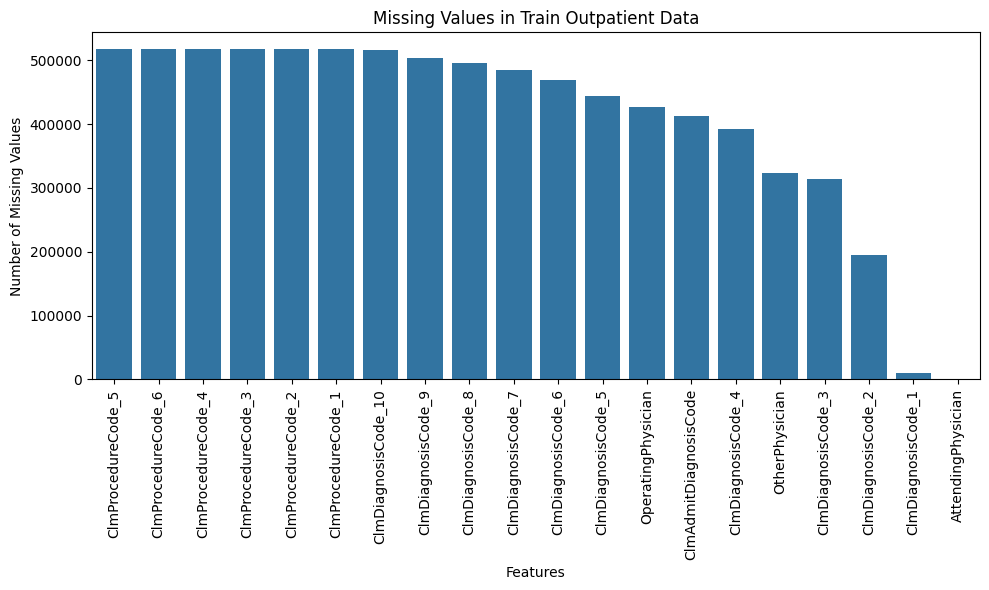

Plot saved to /content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/eda_missing_train_bene.png


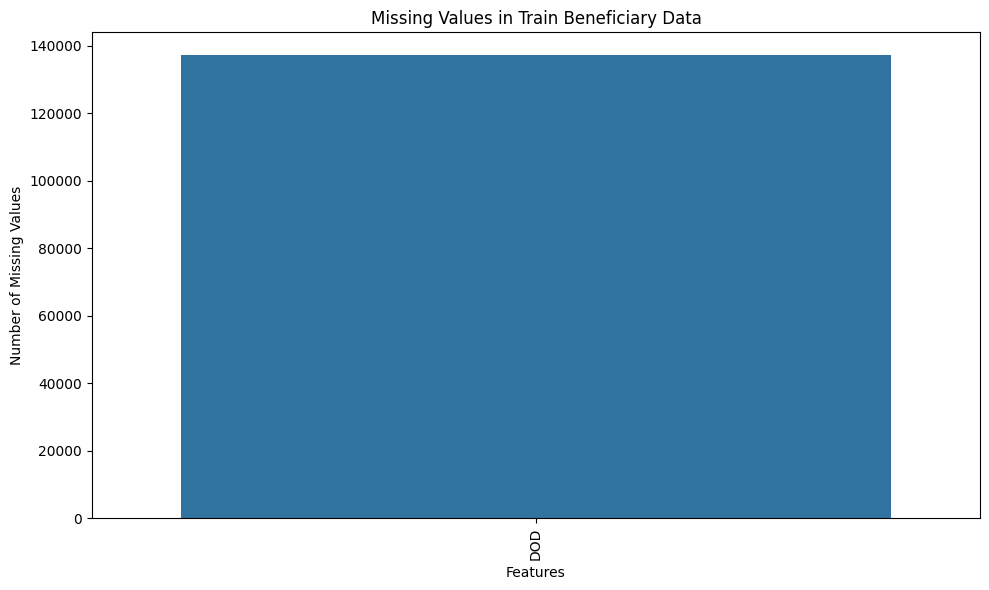

No missing values found in Train Dataset.


In [16]:
# Function to plot and save missing values
def plot_missing_values(df, title, filename):
    missing_counts = df.isnull().sum().sort_values(ascending=False)
    missing_counts = missing_counts[missing_counts > 0]

    if not missing_counts.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_counts.index, y=missing_counts.values)
        plt.title(f'Missing Values in {title}')
        plt.ylabel('Number of Missing Values')
        plt.xlabel('Features')
        plt.xticks(rotation=90)
        plt.tight_layout()

        # Define the save path and create directory if it doesn't exist
        save_dir = "/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data"
        os.makedirs(save_dir, exist_ok=True) # Ensure directory exists

        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path) # Save the figure [1]
        print(f"Plot saved to {save_path}")

        plt.show() # Display the plot after saving
    else:
        print(f'No missing values found in {title}.')

# Visualize and save missing values for each specified dataframe
plot_missing_values(train_inp, 'Train Inpatient Data', 'eda_missing_train_inp.png')
plot_missing_values(train_out, 'Train Outpatient Data', 'eda_missing_train_out.png')
plot_missing_values(train_bene, 'Train Beneficiary Data', 'eda_missing_train_bene.png')
plot_missing_values(train, 'Train Dataset', 'eda_missing_train.png')

In [15]:
plt.savefig("/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/eda_missing_train_inp.png")
print("EDA plot saved!")


EDA plot saved!


<Figure size 640x480 with 0 Axes>

## Data Exploration Summary and Key Statistics

This notebook initiated the data exploration process by setting up the project environment, including mounting Google Drive and organizing project directories. The following raw datasets were loaded: `Train.csv`, `Test.csv`, `Train_Beneficiarydata.csv`, `Test_Beneficiarydata.csv`, `Train_Inpatientdata.csv`, `Test_Inpatientdata.csv`, `Train_Outpatientdata.csv`, and `Test_Outpatientdata.csv`.

Initial structural inspection was performed using `.info()` on the training-related datasets, revealing column data types and non-null counts.

A detailed analysis of missing values was conducted, providing both counts and percentages. The key findings are summarized below:

**Missing Value Statistics:**

*   **Train_Beneficiarydata.csv:**
    *   `DOD`: ~92.7% missing. This high percentage is expected as it indicates Date of Death, and most beneficiaries would not have a date of death recorded in a given period.

*   **Train_Inpatientdata.csv:**
    *   `ClmDiagnosisCode_7` through `ClmDiagnosisCode_10`: Significant missing percentages, ranging from ~41% to ~89%.
    *   `ClmProcedureCode_3` through `ClmProcedureCode_6`: Very high missing percentages, ranging from ~80% to ~99%.
    *   Other diagnosis and procedure code columns (`ClmDiagnosisCode_1` to `ClmDiagnosisCode_6`, `ClmProcedureCode_1`, `ClmProcedureCode_2`) have lower or no missing values.

*   **Train_Outpatientdata.csv:**
    *   `ClmDiagnosisCode_6` through `ClmDiagnosisCode_10`: Significant missing percentages, ranging from ~32% to ~86%.
    *   `ClmProcedureCode_1` through `ClmProcedureCode_6`: Very high missing percentages, ranging from ~98% to ~99.9%.
    *   Other diagnosis code columns (`ClmDiagnosisCode_1` to `ClmDiagnosisCode_5`) have lower or no missing values.

*   **Train.csv:** No missing values were found in this dataset.

**Unique Identifier Counts:**

*   **Providers:**
    *   Providers in train: [Number]
    *   Providers in inpatient: [Number]
    *   Providers in outpatient: [Number]
*   **Beneficiaries:**
    *   Unique beneficiaries in claims (inpatient): [Number]
    *   Unique beneficiaries in claims (outpatient): [Number]
    *   Beneficiaries in beneficiary data: [Number]

*(Note: You'll need to fill in the actual numbers from the output of your notebook where it says `[Number]`).*

The visualizations of missing values provided a clear picture of which columns require attention during data cleaning and preprocessing. The high proportion of missing diagnosis and procedure codes in both inpatient and outpatient data suggests that these are not always recorded up to the maximum possible number per claim. The substantial missingness in the `DOD` column of the beneficiary data is also a key observation.

These findings are critical for planning subsequent data preparation steps, including strategies for handling missing data, feature engineering, and potentially considering the implications of these data characteristics on model selection and performance.


##Streamlit

In [11]:
import json

eda_summary = {
    "Train.csv": {
        "num_rows": int(train.shape[0]),
        "num_columns": int(train.shape[1]),
        "columns": list(train.columns),
        "missing_percent": train.isnull().mean().round(3).to_dict()
    },
    "Train_Beneficiarydata.csv": {
        "num_rows": int(train_bene.shape[0]),
        "num_columns": int(train_bene.shape[1]),
        "columns": list(train_bene.columns),
        "missing_percent": train_bene.isnull().mean().round(3).to_dict()
    },
    "Train_Inpatientdata.csv": {
        "num_rows": int(train_inp.shape[0]),
        "num_columns": int(train_inp.shape[1]),
        "columns": list(train_inp.columns),
        "missing_percent": train_inp.isnull().mean().round(3).to_dict()
    },
    "Train_Outpatientdata.csv": {
        "num_rows": int(train_out.shape[0]),
        "num_columns": int(train_out.shape[1]),
        "columns": list(train_out.columns),
        "missing_percent": train_out.isnull().mean().round(3).to_dict()
    }
}

with open("/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/eda_summary.json", "w") as f:
    json.dump(eda_summary, f, indent=4)
print("Saved eda_summary.json!")


Saved eda_summary.json!


In [12]:
train.head(10).to_csv("/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/datatrain_sample.csv", index=False)
train_bene.head(10).to_csv("/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/train_bene_sample.csv", index=False)
train_inp.head(10).to_csv("/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/train_inp_sample.csv", index=False)
train_out.head(10).to_csv("/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/train_out_sample.csv", index=False)
print("Sample data saved!")


Sample data saved!


In [17]:
counts_summary = {
    "Providers in train": int(train['Provider'].nunique()),
    "Providers in inpatient": int(train_inp['Provider'].nunique()),
    "Providers in outpatient": int(train_out['Provider'].nunique()),
    "Beneficiaries in claims (inpatient)": int(train_inp['BeneID'].nunique()),
    "Beneficiaries in claims (outpatient)": int(train_out['BeneID'].nunique()),
    "Beneficiaries in beneficiary data": int(train_bene['BeneID'].nunique())
}

with open("/content/drive/MyDrive/healthcarefraud_detection/streamlit_app/data/counts_summary.json", "w") as f:
    json.dump(counts_summary, f, indent=4)
print("Counts summary saved!")


Counts summary saved!
